In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [5]:
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')                      
# Fashion dataset is provided by mnist and this fashion dataset is converted into CSV file and mnist dataset is not converted into CSV file.
# Fashion dataset two part - 1.train dataset 2. test dataset 

In [6]:
fashion_train.shape

(60000, 785)

In [7]:
x_train_fashion = fashion_train.drop('label',axis=1)
y_train_fashion = fashion_train['label']
x_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test['label']
# In train removing output[label] in column wise[axis=1]

In [8]:
x_train_fashion

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train_fashion.shape

(60000, 784)

In [10]:
y_train_fashion

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [11]:
y_train_fashion.shape

(60000,)

In [12]:
x_train_re=x_train_fashion.values.reshape(-1,28,28)
x_test_re=x_test_fashion.values.reshape(-1,28,28)

In [13]:
x_train_re.shape

(60000, 28, 28)

In [14]:
col=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankleboot']

In [15]:
print(len(col))

10


In [16]:
print(len(y_train_fashion))

60000


In [17]:
print(x_train_fashion.shape)

(60000, 784)


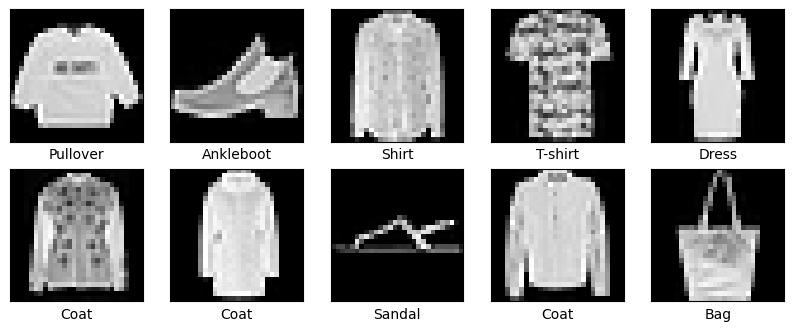

In [18]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_fashion.values[i].reshape(28,28),cmap='gray')
    plt.xlabel(col[y_train_fashion[i]])
plt.show()

In [19]:
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)

In [20]:
modell=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
    ])

C:\Users\Public\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
modell.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history=modell.fit(x_train_fashion,y_train_fashion,batch_size=100,epochs=30,validation_data=[x_test_fashion,y_test_fashion])

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7057 - loss: 0.9035 - val_accuracy: 0.8361 - val_loss: 0.4937
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7871 - loss: 0.6400 - val_accuracy: 0.8479 - val_loss: 0.4480
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8017 - loss: 0.5856 - val_accuracy: 0.8462 - val_loss: 0.4646
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8121 - loss: 0.5532 - val_accuracy: 0.8677 - val_loss: 0.4249
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8162 - loss: 0.5377 - val_accuracy: 0.8544 - val_loss: 0.4412
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8209 - loss: 0.5228 - val_accuracy: 0.8575 - val_loss: 0.4478
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8235 - loss: 0.5214 - val_accuracy: 0.8589 - val_loss: 0.4612
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8259 - loss: 0.5095 - val_accuracy: 0.

In [23]:
test_loss_fashion,test_acc_fashion=modell.evaluate(x_test_fashion,y_test_fashion)
# Evaluate means predict the answer for the test dataset and it will tell the model studed well or not 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8729 - loss: 0.4203    


In [24]:
print('Fashion MNIST test accuracy:',round(test_acc_fashion,4))

Fashion MNIST test accuracy: 0.8729


In [25]:
y_predict_fash=modell.predict(x_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


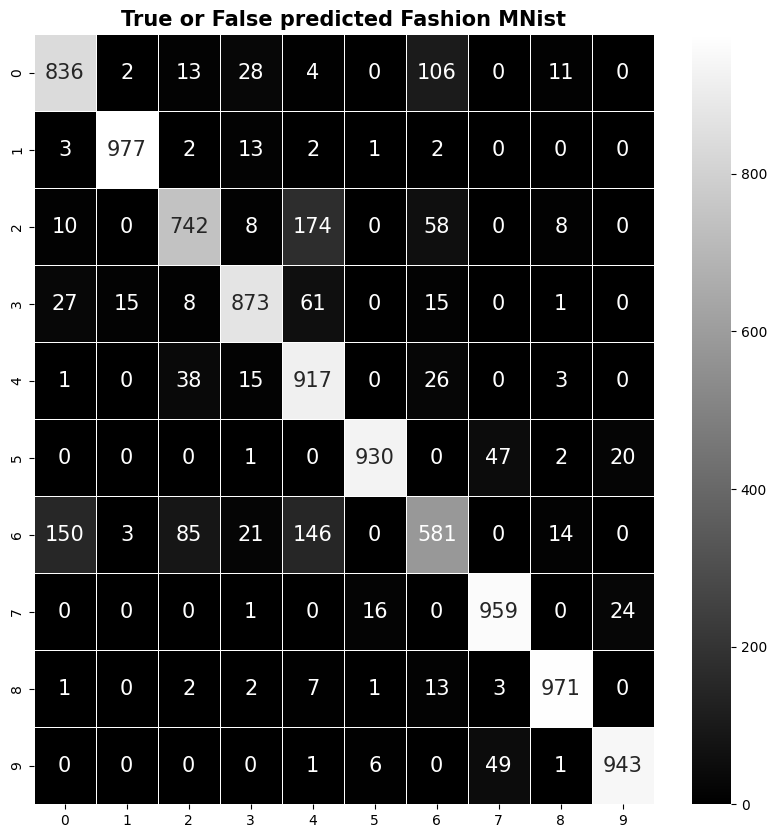

In [26]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted Fashion MNist',fontweight='bold',fontsize=15)
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))
print(history.history.keys())

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.74      0.79      1000
           3       0.91      0.87      0.89      1000
           4       0.70      0.92      0.79      1000
           5       0.97      0.93      0.95      1000
           6       0.73      0.58      0.65      1000
           7       0.91      0.96      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


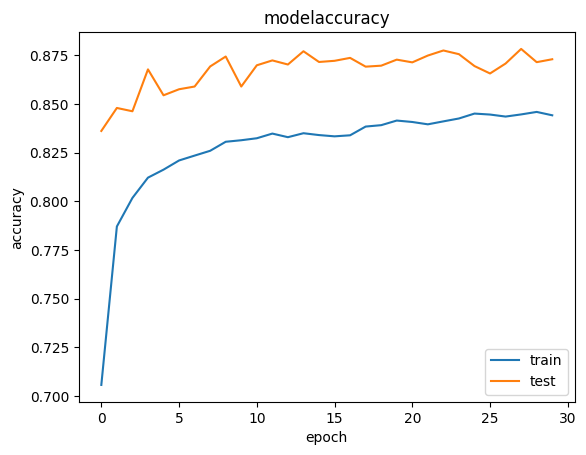

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelaccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

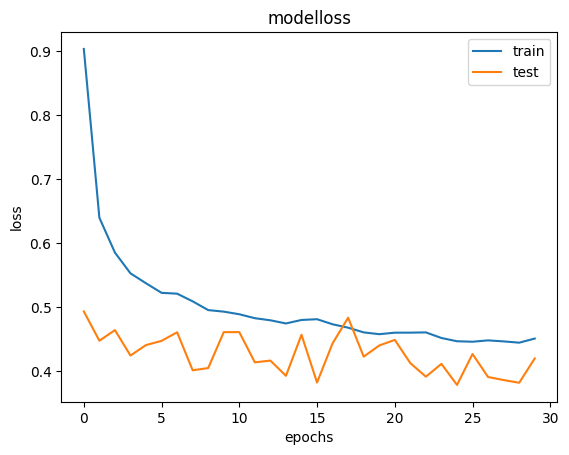

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelloss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='best')
plt.show()

In [30]:
y_predict=modell.predict(x_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_fashion,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


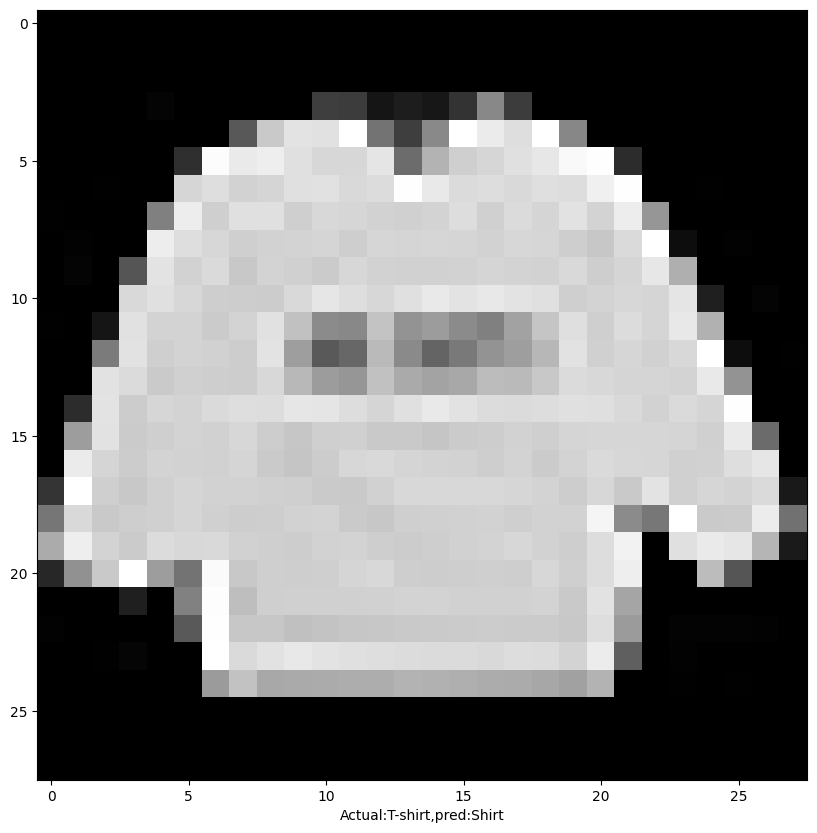

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(x_train_re[0],cmap='gray')
plt.xlabel('Actual:{},pred:{}'.format(col[np.argmax(y_test_fashion[0])],col[y_predict[0]]))
plt.show()

In [ ]:
Step 1: Import Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Step 2: Prepare Data

Suppose you have features X and labels Y.

# Example dummy data
X = np.random.rand(1000, 20)   # 1000 samples, 20 features
Y = np.random.randint(0, 3, 1000)  # 3 classes

# Convert labels to one-hot encoding
Y = to_categorical(Y, num_classes=3)

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Step 3: Build the Model
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))  # 3 classes

Step 4: Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Step 5: Train the Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=50,
                    batch_size=32)

Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

Step 7: Make Predictions
y_pred = model.predict(X_test)
pred_classes = np.argmax(y_pred, axis=1)  # predicted class
true_classes = np.argmax(Y_test, axis=1)  # actual class


✅ Summary of Steps:

Import libraries

Prepare data (features, labels, one-hot encoding)

Build ANN model (layers + activation)

Compile model (loss + optimizer + metrics)

Train model (fit)

Evaluate model (evaluate)

Make predictions (predict)